# System Contenion Detection
## Study by EverHold data

# 1. Data Exploration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from keras.preprocessing.text import Tokenizer # for Dictionary set up
from keras.preprocessing import sequence # for data preprocess: work transfer to number list

D:\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
df = pd.read_csv("input\Multi Same Hold.csv", encoding='ISO-8859-15')
#df.head(3)

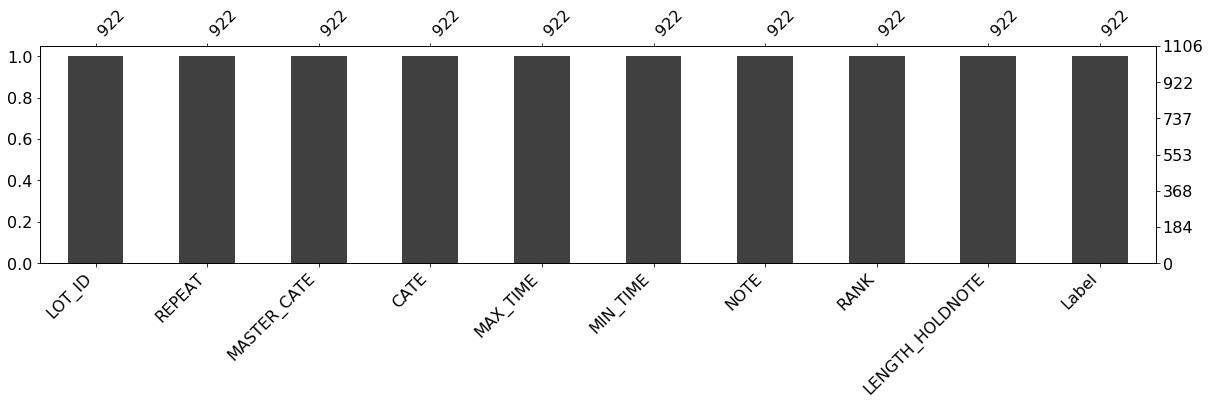

In [4]:
# Missing data review
import missingno as msno
msno.bar(df,figsize=(20,4))

In [5]:
df.describe()

,REPEAT,RANK,LENGTH_HOLDNOTE,Label
count,922.000000,922.0,922.000000,922.000000
mean,2.405640,1.0,36.901302,0.784165
std,1.033789,0.0,4.229058,0.411624
min,2.000000,1.0,24.000000,0.000000
25%,2.000000,1.0,35.000000,1.000000
50%,2.000000,1.0,35.000000,1.000000
75%,2.000000,1.0,35.000000,1.000000
max,10.000000,1.0,50.000000,1.000000


In [6]:
df.shape

(922, 10)

In [7]:
all_texts = []
for i in range(922):
    all_texts.append(df.iloc[i, 6])
print(all_texts[0])

SYSAUTO--MFG ||[PWB service daemon] hold lot--SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P1/NTUSC1] to [P7/KPUSE1] by [SYSAUTO]----,SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P1/NTUSC1] to [P7/KPUSE1] by [SYSAUTO]--DXSVRMGR--@DataXferAdapter||Hold lot release.----,SYSAUTO--MFG ||[PWB service daemon] hold lot--SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P7/KTSK74] to [P1/NCSK01] by [SYSAUTO]----


In [8]:
all_labels = []
for i in range(922):
    all_labels.append(df.iloc[i, 9])
print(all_labels[0])

1


# 2. Data Preprocess

## 2.1 Data Normalization

In [9]:
### Remove html tag
import re                               #import Reqular Expression
def rm_tags(text):
    re_tag = re.compile('<[^>]+>')     #建立re_tag正規表示變數為 <[^>]+>
    return re_tag.sub('', text)         #使用re_tag 將text文字中, 符合正規表示式條件的文字, 替換成空字串

In [10]:
train_text = []
for i in range(922):
    train_text.append(rm_tags("".join(all_texts[i])))
print(train_text[0])

SYSAUTO--MFG ||[PWB service daemon] hold lot--SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P1/NTUSC1] to [P7/KPUSE1] by [SYSAUTO]----,SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P1/NTUSC1] to [P7/KPUSE1] by [SYSAUTO]--DXSVRMGR--@DataXferAdapter||Hold lot release.----,SYSAUTO--MFG ||[PWB service daemon] hold lot--SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P7/KTSK74] to [P1/NCSK01] by [SYSAUTO]----


## 2.2 Tokenizer
Because the deep learning model can only accept numbers, we must convert the text into numbers. Before the conversion, we must have a **dictionary** of words converted into numbers. The **Tokenizer** module provided by **Keras** helps us build the dictionary.

In [68]:
token = Tokenizer(num_words=2000) #建立一個2000個字的字典
token.fit_on_texts(train_text)

In [69]:
print(token.document_count)

922


In [70]:
print(token.word_index)

{'hold': 1, 'sysauto': 2, 'from': 3, 'to': 4, 'lot': 5, 'for': 6, 'by': 7, 'data': 8, 'p7': 9, 'xfer': 10, 'status': 11, 'transfer': 12, 'wfft': 13, 'wfdx': 14, 'mfg': 15, 'service': 16, 'daemon': 17, 'pwb': 18, 'release': 19, 'f12lpa': 20, 'auto': 21, 'p5': 22, 'skip': 23, 'p6': 24, 'action': 25, 'dxsvrmgr': 26, 'dataxferadapter': 27, 'plan': 28, 'p4': 29, 'after': 30, 'in': 31, 'cancel': 32, 'system': 33, 'not': 34, 'is': 35, 'check': 36, 'please': 37, 'lotact': 38, 'if': 39, 'will': 40, 'the': 41, 'checking': 42, 'released': 43, 'order': 44, 'executememo': 45, 'ecp2': 46, 'right': 47, 'click': 48, 'jpusb7': 49, 'fail': 50, 'config': 51, '1': 52, 'wb': 53, 'before': 54, 'aoauser': 55, 'releaserhspwhile': 56, 'locate': 57, 'abo': 58, 'kpuse1': 59, 'heusb1': 60, 'gtusa1': 61, 'kbusd1': 62, 'kpusc1': 63, 'etb': 64, 'heusb2': 65, 'ecop': 66, 's0036': 67, 'hsusa1': 68, 'hcgui': 69, 'hiusb4': 70, 'kaob31': 71, 'tcs': 72, 'kiusn1': 73, 'ltnr': 74, 'gdsk32': 75, 'jpsk65': 76, 'hpusb4': 77, '

## 2.3 Data Transfer
Words transfer to number list for deep learning input.

In [71]:
x_train_seq = token.texts_to_sequences(train_text)

In [72]:
print(len(train_text[3]))
print(train_text[3])

950
F12LPA--@||ConfirmLot auto gatePass.--F12LPA--@||Auto release RHSP: auto gatePass fail.try gatePassWithData----,F12LPA--@P6_WET||LotAct will auto release hold after checking:[C/L]ConfirmLot_M,HSIEHCCB. If the hold is not released, please check ExecuteMemo in ECP2 Lot Action (right click Order -> Action Config).--F12LPA--@||
Auto release LPHL: Action °õŠæ§¹²Š,µ¥«Ý§å³fÄ~Äò€U³f
Lot Action  are all completed at this step.
----,SYSAUTO--Fail in SRTS-tsmc_txOpeLocateReq()0010604E:There is futureHoldRequest at [N074W82AL1011_FAB.001] [3605.552] in skip operation hold by [HSIEHCCB].
žõ¯ž€€Š³€H³]©w¥ŒšÓŒÈžm[]--HSIEHCCB--||aoauser:rls[ECOP](HSIEHCCB)(release):ABO(S0036_HCGUI)----,HSIEHCCB--@P6_WET||*F12DIF->P6_WET*w[ECOP](HSIEHCCB)(C), H1:ABO(S0036_HCGUI)(Hold By AOA)--HSIEHCCB--||aoauser:rls[ECOP](HSIEHCCB)(release):ABO(S0036_HCGUI)----,F12LPA--@||ConfirmLot auto gatePass.--F12LPA--@||Auto release RHSP: auto gatePass fail.try gatePassWithData----


In [73]:
print(len(x_train_seq[3]))
print(x_train_seq[3])

134
[20, 129, 21, 184, 20, 21, 19, 302, 21, 184, 50, 243, 303, 20, 24, 567, 38, 40, 21, 19, 1, 30, 42, 183, 328, 129, 518, 415, 39, 41, 1, 35, 34, 43, 37, 36, 45, 31, 46, 5, 25, 47, 48, 44, 25, 51, 20, 21, 19, 158, 25, 175, 176, 177, 5, 25, 170, 154, 178, 90, 153, 159, 2, 50, 31, 568, 569, 570, 148, 149, 35, 150, 90, 783, 124, 139, 454, 1038, 31, 23, 140, 1, 7, 415, 151, 155, 415, 55, 106, 66, 415, 19, 58, 67, 69, 415, 24, 567, 1039, 24, 567, 483, 66, 415, 183, 318, 58, 67, 69, 1, 7, 100, 415, 55, 106, 66, 415, 19, 58, 67, 69, 20, 129, 21, 184, 20, 21, 19, 302, 21, 184, 50, 243, 303]


## 2.4 Pad Sequences
The number of words to the deep learning model must be fixed. However, the number of words in each hold lot is not fixed. So we have to shorten the length of the text.

In [74]:
# 固定字數500, 不夠者補0,超出者截掉
x_train = sequence.pad_sequences(x_train_seq, maxlen=500) # align SQL t5.repeat <=10 and LENGTH(t5.hold_note) <=50

In [91]:
x_train.shape

(922, 500)

In [78]:
# 看前100筆train set 有哪些資串<500
list = []
for i in range(100):
    if len(x_train_seq[i]) < 500:
        list.append(i)
print(list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [77]:
print(len(x_train_seq[6]),len(x_train[6]))
x_train[6]

76 500


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [81]:
# 看前500筆train set 有哪些資串>500
list = []
for i in range(500):
    if len(x_train_seq[i]) > 500:
        list.append(i)
print(list)

[331, 352]


In [82]:
print(len(x_train_seq[331]),len(x_train[331]))
x_train[331]

566 500


array([   8,   10,    3,   24,  126,    4,    9,   63,    7,    2,    2,
         12,    1,   11,    3,   13,    4,   14,    6,    8,   10,    3,
         24,  126,    4,    9,   63,    7,    2,   26,   27,    1,    5,
         19,  716,   24,  252,  196,  430,  308,  220,   24,  252,  152,
        266,  267,    8,  462,  352,  850,  851,  612,  704,   66,  716,
        291,   58,   67,   69,    1,    7,  100,   55,   24,  252,  196,
        430,  308,  220,   24,  252,  152,  266,  267,    8,  462,  352,
        850,  851,  612,  704,   66,  716,  291,   58,   67,   69,    1,
          7,  100,   72,  162,  163,    1,  114,   72,  164,  165,    3,
        166,   72,   21,   19,  167,    1, 1111,   24,  252,   38,  431,
        432,  613,  852,  614,   84,  536,  853,   83,  854,  110,  124,
        431,  432,  613,  855,  856,   81,  857,  717,   38,  858,   44,
        537,  718,  859,  431,  432,  613,  852,  614,   84,  536,  853,
         83,  854,  110,  124,  431,  432,  613,  8

## 2.5 Data conversion of Label

In [99]:
y_train = np.array(df['Label'])
y_train.shape

(922,)

# 4. Model Training

In [83]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.embeddings import Embedding # 將數字list 轉換成 向量list

## 4.1 Embedding Model
## Embedding Introduction
Word embedding is one of the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

The core concept of word embeddings is that every word used in a language can be represented by a set of real numbers (a vector). Word embeddings are N-dimensional vectors that try to capture word-meaning and context in their values. Any set of numbers is a valid word vector, but to be useful, a set of word vectors for a vocabulary should capture the meaning of words, the relationship between words, and the context of different words as they are used naturally.

### Input size
2D tensor of size (batch_size, sequence_length).

### Output size
The 3D tensor of size (batch_size, sequence_length, output_dim).

<img style="float: left;" src="emb.png" width="80%">

### Embedding Model Setup

In [88]:
model = Sequential()
model.add(Embedding(input_dim=2000,input_length=500, output_dim=32)) 
# input dimension is 2000: 之前設定字典 2000 words
# input_length is 500: 數字list 每筆有100
# output_dimension is 32: 將數字list 轉換成維度是32的向量

model.add(Dropout(0.2)) #without Drop 訓練時, acc一直>0.9, val<0.42, 嚴重overfit
model.add(Flatten()) # 數字list 500, 轉成32維度向量, 因此平坦層神經元共 500*32=16000
model.add(Dense(units=256, activation='relu')) #建立隱藏層 with 256個神經元
model.add(Dropout(0.35))

model.add(Dense(units=1,activation='sigmoid')) #output dimensoin is 1 (0:負面評價, 1:正面評價)
# sigmoid 適用於2進制分類, softmax適用於多元分類
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           64000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               4096256   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 4,160,513
Trainable params: 4,160,513
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [100]:
train_history = model.fit(x_train, y_train, batch_size=100, epochs=20, verbose=2, validation_split=0.2) 

Train on 737 samples, validate on 185 samples
Epoch 1/20
 - 9s - loss: 0.4047 - acc: 0.8005 - val_loss: 0.1409 - val_acc: 0.9892
Epoch 2/20
 - 3s - loss: 0.0952 - acc: 0.9701 - val_loss: 0.0315 - val_acc: 0.9892
Epoch 3/20
 - 3s - loss: 0.0355 - acc: 0.9919 - val_loss: 0.0220 - val_acc: 0.9946
Epoch 4/20
 - 3s - loss: 0.0157 - acc: 0.9959 - val_loss: 0.0164 - val_acc: 0.9946
Epoch 5/20
 - 3s - loss: 0.0121 - acc: 0.9959 - val_loss: 0.0132 - val_acc: 0.9946
Epoch 6/20
 - 3s - loss: 0.0057 - acc: 0.9986 - val_loss: 0.0124 - val_acc: 0.9946
Epoch 7/20
 - 3s - loss: 0.0056 - acc: 0.9973 - val_loss: 0.0125 - val_acc: 0.9946
Epoch 8/20
 - 3s - loss: 0.0033 - acc: 0.9986 - val_loss: 0.0102 - val_acc: 0.9946
Epoch 9/20
 - 3s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0089 - val_acc: 0.9946
Epoch 10/20
 - 3s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0090 - val_acc: 0.9946
Epoch 11/20
 - 3s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0091 - val_acc: 0.9946
Epoch 12/20
 - 3s - loss: 0.0013 - acc:

### Training Result

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline
fontsize=20
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History', fontsize=fontsize)
    plt.ylabel(train, fontsize=fontsize)
    plt.xlabel('Epoch', fontsize=fontsize)
    plt.tick_params(axis='y',labelsize=20)
    plt.tick_params(axis='x',labelsize=20)
    plt.legend(['train','validation'], loc='upper left', fontsize=fontsize) #設定顯示標題於左上角
    plt.show()

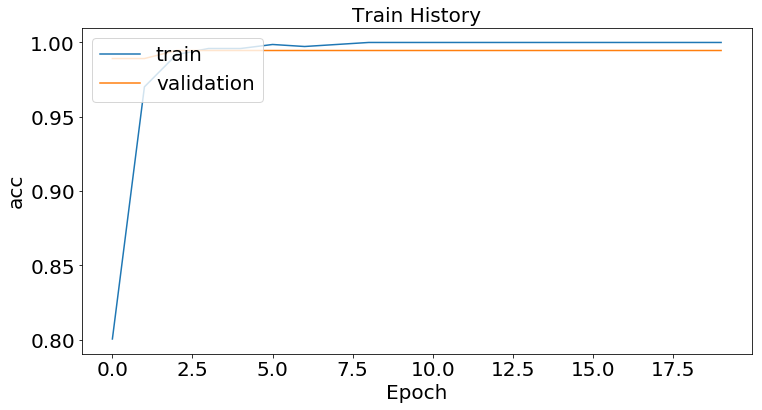

In [168]:
plt.figure(figsize=(12,6))
show_train_history(train_history,'acc','val_acc')

### Summary of Embedding Model
1. Dropout is necessary and will improve the over fitting problem
2. Increase the number of dictionaries (dimensions) to improve accuracy
3. Natural language/video film/meteorological observation/stock trading issues are chronological. MLP/CNN can only be identified according to the current state. To deal with the chronological problem, use the RNN or LSTM model.
 * Natural language: Only one word can be heard at the same time. The previous language will affect the meaning of the language.
 * Video: The film is a photo of the photo, in chronological order
 * Meteorological observations: Weather information changes over time
 * Stock trading: After the stock market opens, the stock price changes over time

## 4.2 RNN (Recurrent Neural Netwirk)
The principle of RNN is to output the neurons and then return them to the input of the neurons. This design neural network has the function of memory, as shown below:

<img style="float: left;" src="RNN.jpg" width="60%">

The above picture has 3 time points: t-1, t, t+1, at the time point of t:
* Xt is the neural network input at time t
* Ot is the neural network output at time t
* (U, V, W) are all neural network parameters, W parameter is the output of t-1 time point, as the input of t time point
* St is a hidden state, representing the memory of the neuron. After the input of the current time point Xt, plus the state of the previous time point (St-1), and the U and W parameters, the evaluation result is as follows:
## St = f([U]Xt + [W]St-1)

## Bidirectional RNN
Bidirectional Recurrent Neural Networks (BRNN) connects two hidden layers of opposite directions to the same output. With this form of generative deep learning, the output layer can get information from past (backwards) and future (forward) states simultaneously.

<img style="float: left;" src="BRNN.png" width="60%">

### RNN Model Setup

In [103]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN

In [107]:
model_RNN = Sequential()
model_RNN.add(Embedding(input_dim=2000, input_length=500, output_dim=32))
model_RNN.add(Dropout(0.35))
model_RNN.add(SimpleRNN(units=16)) # 16層RNN
model_RNN.add(Dense(units=256,activation='relu')) #影藏層256層
model_RNN.add(Dropout(0.35))
model_RNN.add(Dense(units=1, activation='sigmoid'))
model_RNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           64000     
_________________________________________________________________
dropout_7 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               4352      
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 69,393
Trainable params: 69,393
Non-trainable params: 0
_________________________________________________________________


In [108]:
model_RNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
train_history_RNN = model_RNN.fit(x_train, y_train, batch_size=100, epochs=10, verbose=2, validation_split=0.2) 

Train on 737 samples, validate on 185 samples
Epoch 1/10
 - 5s - loss: 0.6189 - acc: 0.8412 - val_loss: 0.4670 - val_acc: 0.9892
Epoch 2/10
 - 2s - loss: 0.3887 - acc: 0.9824 - val_loss: 0.2567 - val_acc: 0.9892
Epoch 3/10
 - 3s - loss: 0.1979 - acc: 0.9891 - val_loss: 0.1199 - val_acc: 0.9892
Epoch 4/10
 - 2s - loss: 0.0930 - acc: 0.9905 - val_loss: 0.0585 - val_acc: 0.9946
Epoch 5/10
 - 3s - loss: 0.0513 - acc: 0.9919 - val_loss: 0.0338 - val_acc: 0.9892
Epoch 6/10
 - 3s - loss: 0.0267 - acc: 0.9959 - val_loss: 0.0270 - val_acc: 0.9892
Epoch 7/10
 - 2s - loss: 0.0152 - acc: 0.9986 - val_loss: 0.0156 - val_acc: 0.9946
Epoch 8/10
 - 2s - loss: 0.0124 - acc: 0.9986 - val_loss: 0.0105 - val_acc: 0.9946
Epoch 9/10
 - 2s - loss: 0.0084 - acc: 1.0000 - val_loss: 0.0122 - val_acc: 0.9946
Epoch 10/10
 - 2s - loss: 0.0064 - acc: 1.0000 - val_loss: 0.0102 - val_acc: 0.9946


### Training Result

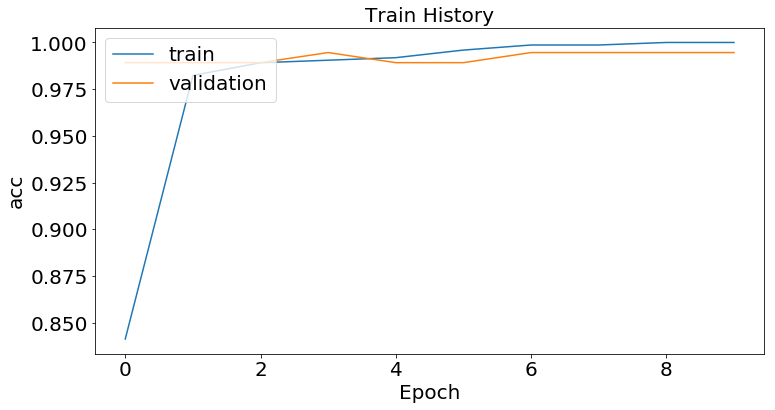

In [170]:
plt.figure(figsize=(12,6))
show_train_history(train_history_RNN,'acc','val_acc')

## 4.3 LSTM (Long-Short Term Memory)
RNN can additionally consider the preceding words to predict the current words, which sounds like they already conform to the language's characteristics. However, the farther away from the current word, the influence of the word will decrease. This phenomenon is called “Vanishing Gradient”, which ignores the ability of human beings to remember something. Therefore, Hochreiter & Schmidhuber, In 1997, the "Long Short Term Memory Network" (LSTM) was introduced to increase the problem of "long-term dependency" through memory.

LSTMs have an edge over conventional feed-forward neural networks and RNN in many ways. This is because of their property of selectively remembering patterns for long durations of time. LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn.

<img style="float: left;" src="LSTM.png" width="60%">

### LSTM Model Setup

In [112]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

In [113]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(input_dim=2000,input_length=500,output_dim=32))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(32))
model_LSTM.add(Dense(units=256,activation='relu'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(units=1,activation='sigmoid'))
model_LSTM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           64000     
_________________________________________________________________
dropout_9 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               8448      
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 81,025
Trainable params: 81,025
Non-trainable params: 0
_________________________________________________________________


In [114]:
model_LSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [115]:
train_history_LSTM = model_RNN.fit(x_train, y_train, batch_size=100, epochs=10, verbose=2, validation_split=0.2) 

Train on 737 samples, validate on 185 samples
Epoch 1/10
 - 3s - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0087 - val_acc: 0.9946
Epoch 2/10
 - 2s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.0071 - val_acc: 0.9946
Epoch 3/10
 - 3s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000
Epoch 4/10
 - 2s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000
Epoch 5/10
 - 2s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 6/10
 - 2s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 0.9946
Epoch 7/10
 - 2s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9946
Epoch 8/10
 - 3s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 0.9946
Epoch 9/10
 - 2s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 10/10
 - 3s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000


### LSTM Model Train Result

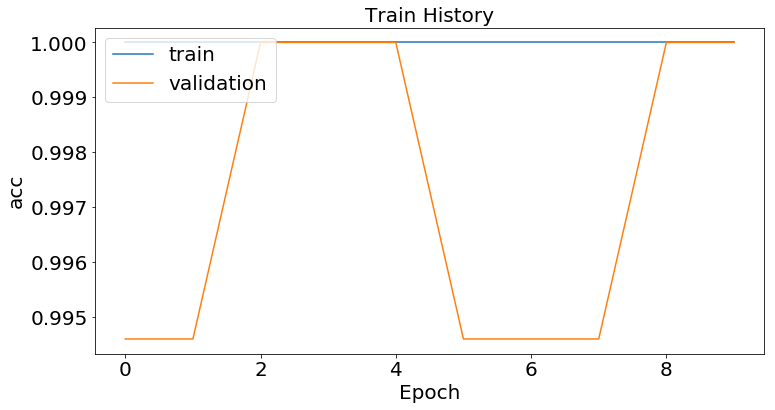

In [171]:
plt.figure(figsize=(12,6))
show_train_history(train_history_LSTM,'acc','val_acc')

# 5. Model Test
We use 3 days of Everhold data (11/11~11/13) as test data. Let's to see what happen.
## 5.1 Import Test Data

In [12]:
df_test = pd.read_csv("Test.csv", encoding='ISO-8859-15')
#df_test.head(3)

In [118]:
df_test.shape

(8, 10)

## 5.2 Data conversion

In [124]:
test_text = []
for i in range(8):
    test_text.append(df_test.iloc[i, 6])
print(test_text[0])

SYSAUTO--MFG ||[PWB service daemon] hold lot--SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P7/KESK06] to [P5/HTUSC1] by [SYSAUTO]----,SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P7/KESK06] to [P5/HTUSC1] by [SYSAUTO]--DXSVRMGR--@DataXferAdapter||Hold lot release.----,SYSAUTO--MFG ||[PWB service daemon] hold lot--SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P5/HTSK21] to [P7/KSGETF] by [SYSAUTO]----,SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P5/HTSK21] to [P7/KSGETF] by [SYSAUTO]--DXSVRMGR--@DataXferAdapter||Hold lot release.----,SYSAUTO--MFG ||[PWB service daemon] hold lot--SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P7/KESK06] to [P5/HTUSC1] by [SYSAUTO]----,SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P7/KESK06] to [P5/HTUSC1] by [SYSAUTO]--DXSVRMGR--@DataXferAdapter||Hold lot release.----,SYSAUTO--MFG ||[PWB service daemon] hold lot--SYSAUTO--

In [125]:
token_test = Tokenizer(num_words=2000) #建立一個2000個字的字典
token_test.fit_on_texts(test_text)

In [126]:
x_test_seq = token.texts_to_sequences(test_text) #文字轉成數字based on 字典

In [127]:
x_test = sequence.pad_sequences(x_test_seq, maxlen=500) #截長補短

In [128]:
y_test = np.array(df_test['Label'])
y_test.shape

(8,)

In [129]:
scores = model_LSTM.evaluate(x_test, y_test, verbose=1)
scores

8/8 [==============================] - 0s 23ms/step


[0.6931567192077637, 0.5]

In [132]:
predict =  model_LSTM.predict_classes(x_test)

In [137]:
predict[:10]

array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [138]:
predict_classes = predict.reshape(-1)
predict_classes[:10]

array([1, 1, 1, 0, 0, 0, 0, 0])

In [139]:
SentimentDict = {1:"Positive", 0:"Negative"} #1: 系統衝突, 0: 系統正常
def display_test_Sentiment(i):
    print(test_text[i])
    print('Label:', SentimentDict[y_test[i]],'Predict:', SentimentDict[predict_classes[i]])

In [140]:
display_test_Sentiment(0)

SYSAUTO--MFG ||[PWB service daemon] hold lot--SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P7/KESK06] to [P5/HTUSC1] by [SYSAUTO]----,SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P7/KESK06] to [P5/HTUSC1] by [SYSAUTO]--DXSVRMGR--@DataXferAdapter||Hold lot release.----,SYSAUTO--MFG ||[PWB service daemon] hold lot--SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P5/HTSK21] to [P7/KSGETF] by [SYSAUTO]----,SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P5/HTSK21] to [P7/KSGETF] by [SYSAUTO]--DXSVRMGR--@DataXferAdapter||Hold lot release.----,SYSAUTO--MFG ||[PWB service daemon] hold lot--SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P7/KESK06] to [P5/HTUSC1] by [SYSAUTO]----,SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P7/KESK06] to [P5/HTUSC1] by [SYSAUTO]--DXSVRMGR--@DataXferAdapter||Hold lot release.----,SYSAUTO--MFG ||[PWB service daemon] hold lot--SYSAUTO--

In [141]:
display_test_Sentiment(1)

SYSAUTO--MFG ||[PWB service daemon] hold lot--SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P7/KISK60] to [P6/JEUSB5] by [SYSAUTO]----,SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P7/KISK60] to [P6/JEUSB5] by [SYSAUTO]--DXSVRMGR--@DataXferAdapter||Hold lot release.----,SYSAUTO--MFG ||[PWB service daemon] hold lot--SYSAUTO--Transfer hold status from WFFT to WFDX for Data Xfer from [P6/JISK79] to [P7/KESK55] by [SYSAUTO]----
Label: Positive Predict: Positive


In [13]:
#df_test.iloc[3]

In [144]:
display_test_Sentiment(3)

SYSMFG--ABO(S000958):Hold for override recipe(Hold By AOA)--SYSMFG--aoauser:ABO(S000958):RLS----,SYSMFG--ABO(S000958):Hold for override recipe(Hold By AOA)--SYSMFG--aoauser:ABO(S000958):RLS----,SYSAUTO--Add HoldCode for Data Xfer from [P7/KPDB10] to [P6/JSGPHA] by [ACT0000140]--DXSVRMGR--@DataXferAdapter||Hold lot release.----,SYSMFG--ABO(S000958):Hold for override recipe(Hold By AOA)--SYSMFG--aoauser:ABO(S000958):RLS----
Label: Negative Predict: Negative


In [14]:
#df_test.iloc[4]

In [147]:
display_test_Sentiment(4)

F12LPA--@||ConfirmLot auto gatePass.--F12LPA--@||Auto release RHSP: auto gatePass fail.try gatePassWithData----,F12LPA--@P6_WET||LotAct will auto release hold after checking:[C/L]ConfirmLot_M,HSIEHCCB. If the hold is not released, please check ExecuteMemo in ECP2 Lot Action (right click Order -> Action Config).--F12LPA--@||
Auto release LPHL: Action °õŠæ§¹²Š,µ¥«Ý§å³fÄ~Äò€U³f
Lot Action  are all completed at this step.
----,SYSAUTO--Fail in SRTS-tsmc_txOpeLocateReq()0010604E:There is futureHoldRequest at [N074W82AL1011_FAB.001] [3605.552] in skip operation hold by [HSIEHCCB].
žõ¯ž€€Š³€H³]©w¥ŒšÓŒÈžm[]--HSIEHCCB--||aoauser:rls[ECOP](HSIEHCCB)(release):ABO(S0036_HCGUI)----,HSIEHCCB--@P6_WET||*F12DIF->P6_WET*w[ECOP](HSIEHCCB)(C), H1:ABO(S0036_HCGUI)(Hold By AOA)--HSIEHCCB--||aoauser:rls[ECOP](HSIEHCCB)(release):ABO(S0036_HCGUI)----,F12LPA--@||ConfirmLot auto gatePass.--F12LPA--@||Auto release RHSP: auto gatePass fail.try gatePassWithData----
Label: Positive Predict: Negative
